In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("complaints.csv")

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-12-07,Checking or savings account,Checking account,Closing an account,Company closed your account,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,CA,94560,NaN,NaN,Phone,2023-12-07,Closed with explanation,Yes,NaN,7967009
1,2023-11-08,Mortgage,Conventional home mortgage,Trouble during payment process,Payment process,Mr Cooper took over our mortgage in XX/XX/2023...,NaN,Mr. Cooper Group Inc.,OH,43119,NaN,Consent provided,Web,2023-11-08,Closed with explanation,Yes,NaN,7819336
2,2024-01-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TN,38018,NaN,NaN,Web,2024-01-09,In progress,Yes,NaN,8129101
3,2024-01-09,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",GA,31558,NaN,NaN,Web,2024-01-09,In progress,Yes,NaN,8133287
4,2024-01-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TN,371XX,NaN,NaN,Web,2024-01-09,In progress,Yes,NaN,8130427


# EDA

In [4]:
df.shape

(4538284, 18)

In [5]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
cols = ['Product', 'Consumer complaint narrative', 'Complaint ID']

In [7]:
df = df.dropna(axis=0, subset=[cols[1]])

In [8]:
df = df[cols]

In [9]:
df.head()

,Product,Consumer complaint narrative,Complaint ID
1,Mortgage,Mr Cooper took over our mortgage in XX/XX/2023...,7819336
5,Credit reporting or other personal consumer re...,I recently reviewed a copy of my credit report...,7920338
16,Credit reporting or other personal consumer re...,I've noticed that these accounts and loans are...,7784897
51,Credit card,See the attached documents. I want the bureau ...,7806745
60,"Credit reporting, credit repair services, or o...",I have fraudulent accounts on my credit profil...,7426153


In [10]:
df["Product"].unique()

array(['Mortgage', 'Credit reporting or other personal consumer reports',
       'Credit card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Consumer Loan', 'Vehicle loan or lease', 'Debt collection',
       'Credit card or prepaid card', 'Student loan',
       'Money transfer, virtual currency, or money service',
       'Checking or savings account',
       'Payday loan, title loan, personal loan, or advance loan',
       'Debt or credit management',
       'Payday loan, title loan, or personal loan', 'Prepaid card',
       'Payday loan', 'Credit reporting', 'Bank account or service',
       'Other financial service', 'Money transfers', 'Virtual currency'],
      dtype=object)

In [11]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    807299
Debt collection                                                                 230296
Mortgage                                                                        112230
Credit card or prepaid card                                                     108666
Credit reporting or other personal consumer reports                              87719
Checking or savings account                                                      84772
Student loan                                                                     39060
Money transfer, virtual currency, or money service                               36092
Credit reporting                                                                 31587
Credit card                                                                      28664
Vehicle loan or lease                                                            27910
Payday loan, title loan, or personal loan  

The labels we want can be found in the `Product` column

<AxesSubplot:>

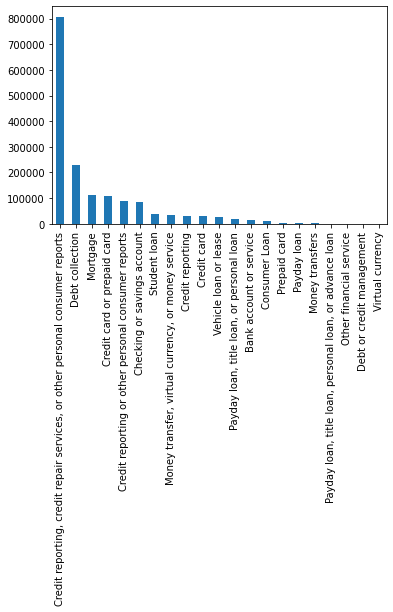

In [12]:
df['Product'].value_counts().plot(kind='bar')

There are multiple classes (21) in `Product` column

So we must split all these into 4 class are per requirement

In [13]:
"""
0 Credit reporting, repair, or other
1 Debt collection
2 Consumer Loan
3 Mortgage
"""
def classify(text):
    text = text.lower()
    if "card" in text or "credit" in text or "credits" in text or "repair" in text:
        return 0
    elif text == "debt collection":
        return 1
    elif "loan" in text:
        return 2
    elif text == "mortgage":
        return 3
    else:
        return 0

In [14]:
ldf = df.copy()
ldf['label'] = df[cols[0]].apply(classify)

Now we have the text, its class and it label.

Along with this we have Compliant ID which we will use later for downsampling

In [15]:
ldf.head()

,Product,Consumer complaint narrative,Complaint ID,label
1,Mortgage,Mr Cooper took over our mortgage in XX/XX/2023...,7819336,3
5,Credit reporting or other personal consumer re...,I recently reviewed a copy of my credit report...,7920338,0
16,Credit reporting or other personal consumer re...,I've noticed that these accounts and loans are...,7784897,0
51,Credit card,See the attached documents. I want the bureau ...,7806745,0
60,"Credit reporting, credit repair services, or o...",I have fraudulent accounts on my credit profil...,7426153,0


In [16]:
ldf['label'].value_counts()

0    1204014
1     230296
3     112230
2      96473
Name: label, dtype: int64

<AxesSubplot:>

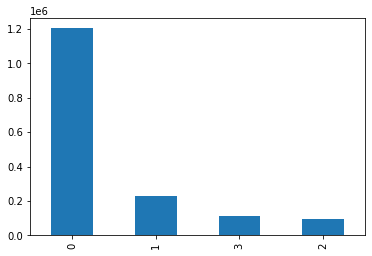

In [17]:
ldf['label'].value_counts().plot(kind='bar')

Since the distrubution of classes is highly immbalanced, we have to downsample the majority class

In [18]:
X = ldf[cols[2]]
y = ldf['label']

In [19]:
X.shape, y.shape

((1643013,), (1643013,))

We are doing test-train split before doing before we downsample because we have to provide model with better unseen data while testing

In [20]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=52)


In [21]:
X.shape, X_test.shape

((1314410,), (328603,))

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
rus = RandomUnderSampler(random_state=52)

X_resampled, y_resampled = rus.fit_resample(X.values.reshape(-1, 1), y)

<AxesSubplot:>

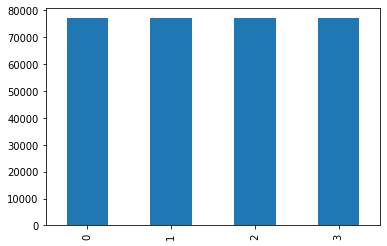

In [24]:
y_resampled.value_counts().plot(kind="bar")

After downsampling, we will get a balanced histogram

In [25]:
y_resampled.value_counts()

0    77032
1    77032
2    77032
3    77032
Name: label, dtype: int64

In [26]:
ldf.shape, X_resampled.shape

((1643013, 4), (308128, 1))

Since we used `Complaint ID` for downsampling as we couldn't downsample with text feature, we have to get the complaints back from complain id

In [27]:
X_test_text = ldf.loc[ldf[cols[2]].isin(X_test)]
X_test_text

,Product,Consumer complaint narrative,Complaint ID,label
51,Credit card,See the attached documents. I want the bureau ...,7806745,0
60,"Credit reporting, credit repair services, or o...",I have fraudulent accounts on my credit profil...,7426153,0
263,"Credit reporting, credit repair services, or o...","I went to XXXX XXXX for facial services, I was...",6114786,0
546,Credit card or prepaid card,It is truly absurd to witness late payments re...,7364157,0
808,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX continues to illegally fur...,7406837,0
...,...,...,...,...
4536846,Checking or savings account,I have called in to the company 5 times on XX/...,5587045,0
4536951,"Payday loan, title loan, or personal loan",I want to make an official documentation befor...,5605972,2
4537737,Debt collection,BAY CR WAS PD XXXX STILL ON CR BUR NOT PAID,4142763,1
4537819,Debt collection,In addition to the below complaint I also have...,4228639,1


In [31]:
ldf = ldf.loc[ldf[cols[2]].isin(X_resampled[:, 0])]

In [32]:
ldf.shape

(308128, 4)

In [33]:
ldf.columns

Index(['Product', 'Consumer complaint narrative', 'Complaint ID', 'label'], dtype='object')

In [34]:
X = ldf['Consumer complaint narrative']
y = ldf['label']

# Text pre-processing

In [35]:
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;.*]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [36]:
X = X.apply(clean_text)

In [37]:
X.shape

(308128,)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

We use TF-IDF vectorization for generating features which will be used for supervised learning

In [39]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [40]:
X.shape

(308128, 122523)

# Model selection and evaluation

First we are going to use simple mulinomial Naive Bayes classifier model

In [57]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [48]:
X_test = X_test_text[cols[1]]
y_test = X_test_text['label']

Applying pre-processing on test dataset

In [49]:
X_test

51         See the attached documents. I want the bureau ...
60         I have fraudulent accounts on my credit profil...
263        I went to XXXX XXXX for facial services, I was...
546        It is truly absurd to witness late payments re...
808        XXXX XXXX XXXX XXXX continues to illegally fur...
                                 ...                        
4536846    I have called in to the company 5 times on XX/...
4536951    I want to make an official documentation befor...
4537737          BAY CR WAS PD XXXX STILL ON CR BUR NOT PAID
4537819    In addition to the below complaint I also have...
4538200    On XX/XX/XXXX, at approximately XXXX. EST, I r...
Name: Consumer complaint narrative, Length: 328603, dtype: object

In [50]:
X_test = X_test.apply(clean_text)

In [53]:
X_test_vec = vectorizer.transform(X_test)

In [54]:
X_test_vec.shape

(328603, 122523)

In [59]:
test_predictions = model.predict(X_test_vec)

In [61]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, test_predictions)
print("Overall Accuracy:", accuracy)


Overall Accuracy: 0.7830999716983716


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85    240607
           1       0.65      0.78      0.71     46135
           2       0.34      0.85      0.49     19441
           3       0.61      0.96      0.75     22420

    accuracy                           0.78    328603
   macro avg       0.64      0.84      0.70    328603
weighted avg       0.86      0.78      0.80    328603



Overall inference:
- Good performance for class 0
- Decent performance for class 1
- Class 2: Model predicts as class 2 many times but some of the times, its wrong
- Class 3: Same as class 2 but number of times model is wrong is less

Overall decent performance


There is imbalance between precision and recalls of class 2 and 3

## Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=52)

In [69]:
rf_classifier.fit(X, y)

RandomForestClassifier(n_estimators=10, random_state=52)

In [71]:
predictions = rf_classifier.predict(X_test_vec)

In [73]:
accuracy = accuracy_score(y_test, predictions)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.7960822025361911


In [72]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.79      0.87    240607
           1       0.58      0.80      0.67     46135
           2       0.39      0.75      0.51     19441
           3       0.65      0.86      0.74     22420

    accuracy                           0.80    328603
   macro avg       0.65      0.80      0.70    328603
weighted avg       0.85      0.80      0.81    328603



Overall inference:
- Similar to previous model, high precision and reasonable recall
- Decent performance for class 1, but precision reduces a little
- Class 2: Model predicts as class 2 many times but some of the times, its wrong
- Class 3: Same as class 2 but number of times model is wrong is less, but better balance between precision and recall

Overall decent perfomance

There is imbalance between precision and recalls of class 2 and 3. But imbalance has improved a little bit

## Support Vector Machine

In [74]:
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC(random_state=52)

In [75]:
svm_classifier.fit(X, y)

LinearSVC(random_state=52)

In [77]:
predictions = svm_classifier.predict(X_test_vec)


In [78]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.97      0.87      0.92    240607
           1       0.68      0.83      0.75     46135
           2       0.53      0.87      0.66     19441
           3       0.80      0.95      0.87     22420

    accuracy                           0.87    328603
   macro avg       0.75      0.88      0.80    328603
weighted avg       0.89      0.87      0.87    328603



Overall inference:
- Good performance for class 0
- Better performance for class 1
- Class 2: Model predicts as class 2 many times but some of the times, its wrong
    - Overall performance increased, but still imbalance is there
- Class 3: high f1 score with good balance between precision and recall
    - Best among all 3 models

Overall all classes except class 2 have good overall score

SVM has significantly better performance on class 3 among other models

Class 2 accuracy is improved but still imbalnced precision and recall